In [1]:
import openmc
import os 
os.environ['OPENMC_CROSS_SECTIONS']='/home/dresden/endfb-viii.0-hdf5/cross_sections.xml'
uo2=openmc.Material()
uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16', 2.0)
uo2.set_density('g/cm3', 10.0)

zirconium = openmc.Material(name="zirconium")
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.6)

gas =openmc.Material()
gas.add_element("He",percent=1)
gas.set_density('g/cm3',0.178*10**-3)

water = openmc.Material(name="h2o")
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)

water.add_s_alpha_beta('c_H_in_H2O')

materials = openmc.Materials([uo2, zirconium, water,gas])

materials.export_to_xml()


/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning: Another UniverseBase instance already exists with id=1.
  warn(msg, IDWarning)


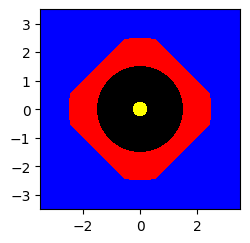

In [4]:
cylinder1 = openmc.ZCylinder(r=0.25)
cylinder2 = openmc.ZCylinder(r=1.5)
cylinder3 = openmc.ZCylinder(r=2.5)
plane1 = openmc.Plane (a=1,b=1,c=0,d=3)
plane2 = openmc.Plane (a=1,b=1,c=0,d=-3)
plane3 = openmc.Plane (a=1,b=-1,c=0,d=3)
plane4 = openmc.Plane (a=1,b=-1,c=0,d=-3)
plane5 = openmc.Plane (a=1,b=0,c=0,d=3)
plane6 = openmc.Plane (a=1,b=0,c=0,d=-3)
lattice = openmc.rectangular_prism(7,7, boundary_type = 'reflective')
cell_0 = openmc.Cell (name='gas', region = -cylinder1, fill = gas)
cell_0_ = openmc.Cell (name='gas', region = +cylinder1 & -cylinder2, fill = uo2 )
cell_1 = openmc.Cell (name='fuel', region = +cylinder2 & -cylinder3 & -plane1 & +plane2 & -plane3 & +plane4, fill = zirconium)
cell_2 = openmc.Cell (name ='water', region = +cylinder2 & lattice, fill = water )
cell_3 = openmc.Cell (name = 'water', region = +plane1 & lattice, fill = zirconium)
cell_4 =openmc.Cell(name='clad',region=- plane2 & lattice,fill=zirconium)
cell_5 =openmc.Cell(name='water',region=+plane3 & lattice ,fill=zirconium)
cell_6 =openmc.Cell(name='clad',region=- plane4 & lattice,fill=zirconium)

root=openmc.Universe(universe_id=1,name="pin cell")
root.add_cells([cell_0_,cell_0,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6])

geometry = openmc.Geometry(root)
geometry.export_to_xml()

root.plot(width=(7,7),color_by='material',colors={uo2:'black',water:'blue',gas:'yellow',zirconium:'red'})

batch=100
inactive=20
particles=10000

settings_file = openmc.Settings()
settings_file.batches = batch
settings_file.inactive = inactive
settings_file.particles = particles
settings_file.export_to_xml()


In [5]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################